# First of all 

- This code works with Python 3 (Python 2 does not work), so be sure that your notebook is using a Python 3 kernel.
- Now we can import the package:

In [1]:
import randomly

# Loading the data

- As an example, we are going to use a dataset of 1459 human pancreas cells from:
Baron, M. et al. A single-cell transcriptomic map of the human and mouse pancreas reveals inter- and intra-cell population structure. Cell Syst. 3, 346–360.e4 (2016)
- You can download this sample data set at http://randomly-example-data.s3-website-us-east-1.amazonaws.com/example.txt.zip
- Unzip the file.
- To load our data, we use Pandas:

In [2]:
import pandas as pd

In [110]:
df=pd.read_table('example.txt', index_col=0)

- The input should be a table with cells in rows and genes in columns:

In [59]:
df.shape

(1459, 17287)

# Initialization and preprocessing 

### Initialization of the model

- Each time that we want to start or re-start the analysis we have to run: 

In [10]:
model = randomly.Rm()

### Preprocessing the data 

- This function removes non-desired cells and genes:   
    1. We remove all the genes and cells that have less than "min_tp"  transcripts expressed.
    2. We remove cells that express less than "min_genes_per_cell" genes.
    3. We remove genes that are expressed in less than "min_cells_per_cell" cells.

In [11]:
model.preprocess(df, min_tp=0, 
                 min_genes_per_cell=0, 
                 min_cells_per_gene=0,
                refined=True)

Cell names are not unique. Cell names are reset
Run the refining function


##### Advanced preprocessing 

- If you want to use the advanced feature "refined=True" (as we have done before) then, as function indicates, you have to run the function model.refining() afterwards:

In [12]:
model.refining(min_trans_per_gene=7)

1459  cells and  11389  genes


- This function removes sparsity in a more efficient way. 
- The parameter "min_trans_per_gene" defines a cut-off on genes. In this example, "min_trans_per_gene" equals 7. This parameter should be choosen such that the total number of remaining genes is bigger than at least 8000. In this example, we leave 11389 genes.

# Model the data using Random Matrix Theory 

In [13]:
model.fit()

Preprocessed data is being used for fitting


### Plot of Marchenko-Pastur distribution

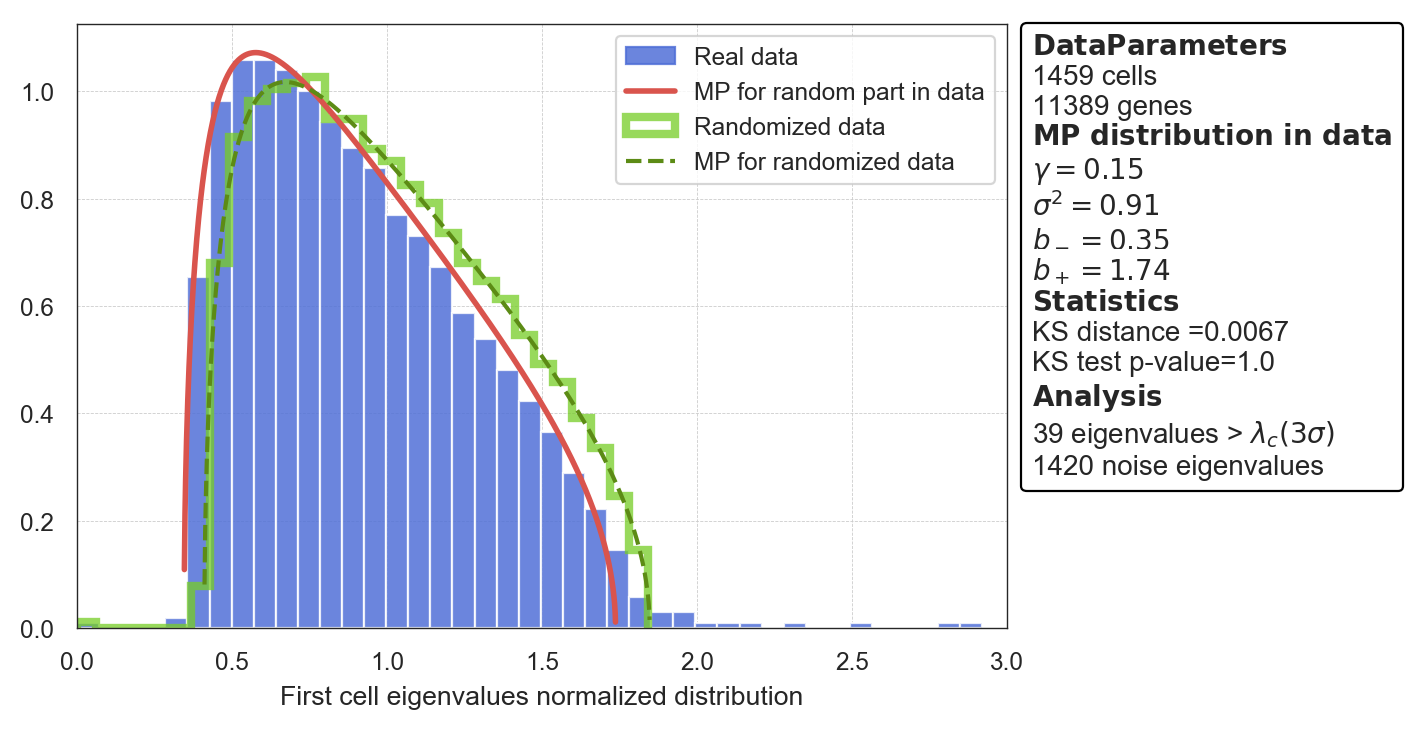

In [14]:
model.plot_mp()

##### Save the plots

If you want to save the plots generated by any of the Randomly functions, you can do it by adding the option "path=folder/name.extension", where extension could be: pdf, png, jpg, etc. For example:

In [ ]:
model.plot_mp(path='Data/my_marchenko.pdf')

### Plot the statstics of signal-like genes 

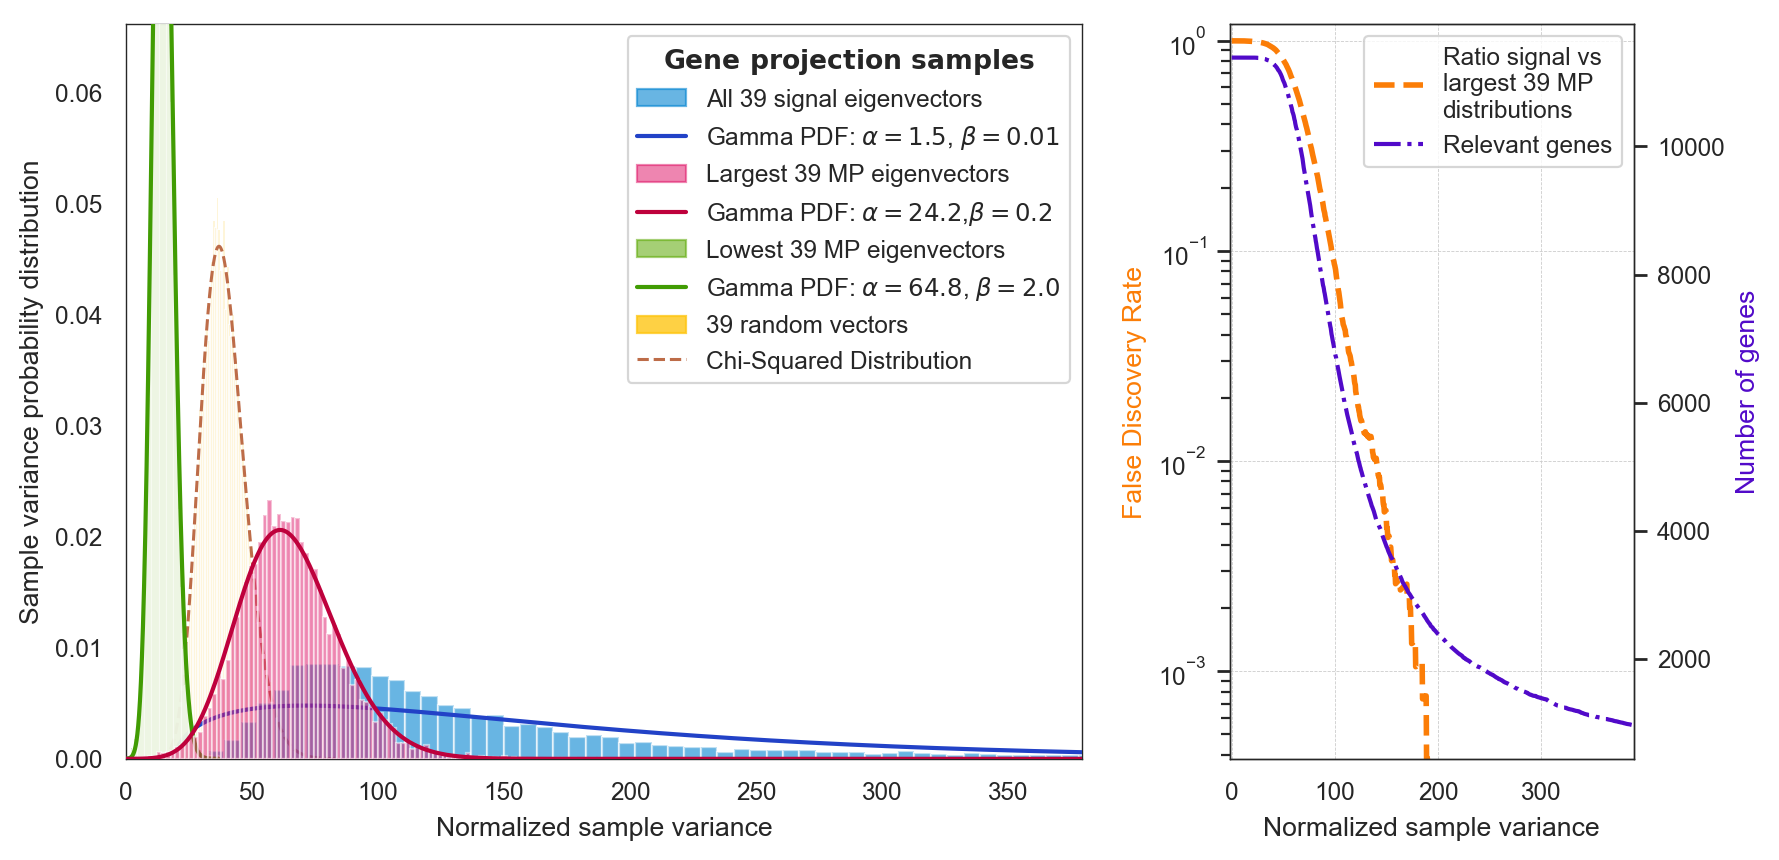

In [15]:
model.plot_statistics()

### Get the denoised data

- You can use the false discovery rate ("fdr") shown in the previous plot to select the genes which are responsible for the signal. In this case, fdr=0.0001 corresponds to 2590 genes:

In [54]:
df2 = model.return_cleaned(fdr=0.0001)

In [55]:
df2.shape

(1459, 2590)

- Alternatively, you can use the Normalized sample variance ("sample_variance") shown in the y-axis of the previous plot. For instance, this allows you to select the top 1100 most signal-like genes. In this case, by selecting "sample_variance" equals 350, we get 1101 genes:

In [39]:
df2 = model.return_cleaned(sample_variance=350)

In [40]:
df2.shape

(1459, 1101)

##### Save the denoised data

If you want to save the denoised dataset in your computer, you can do it by adding the option "path=folder/name.txt". For example:

In [111]:
df2 = model.return_cleaned(sample_variance=350, path='Data/my_denoised_data.txt')

# Visualize your denoised system 

### t-SNE plot for visualization 

Once you know the signal-like genes you want to use based on the previous step, Randomly allows you to visualize it using t-SNE:

In [41]:
model.fit_tsne(sample_variance=350)

computing t-SNE, using Multicore t-SNE for 4 jobs
atribute embedding is updated with t-SNE coordinates


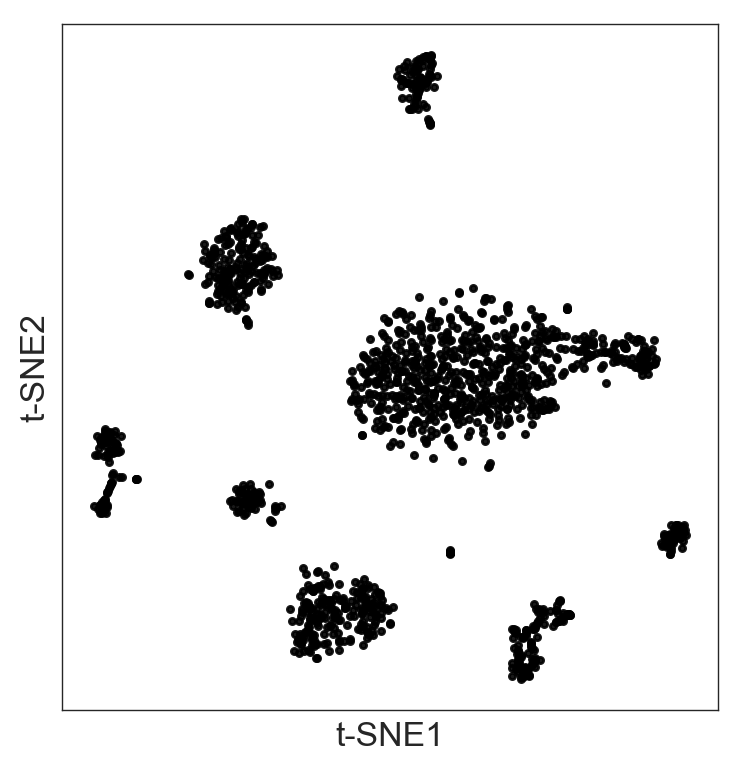

In [42]:
model.plot()

### Hierarchical clustering 

- Randomly has a function to perform unsupervised hierarchical clustering in the denoised data: 

In [43]:
model.fit_hierarchical()

- By adjusting the threshold "thrs", you can select the clusters:

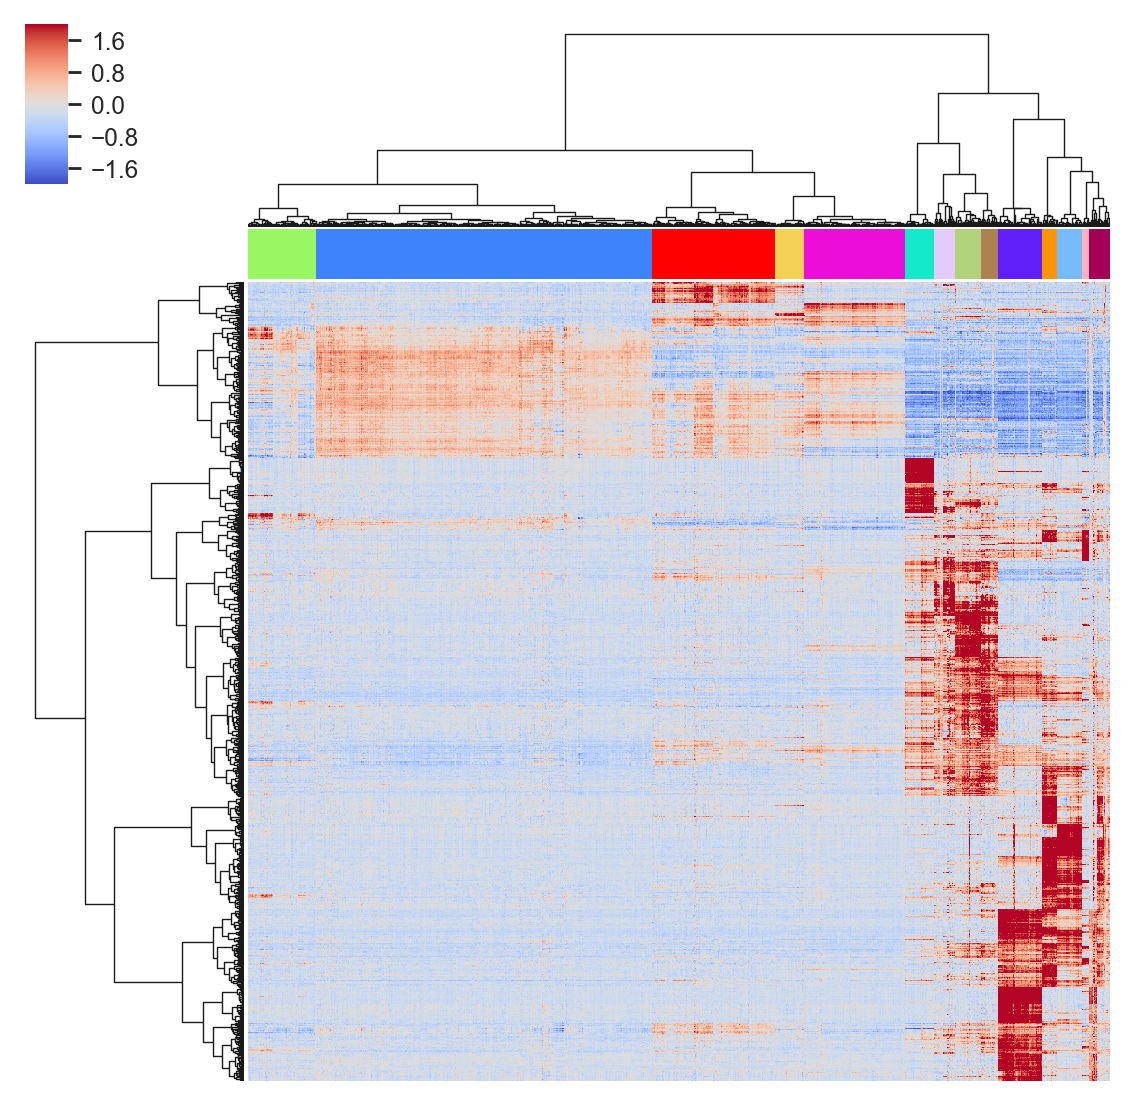

In [82]:
model.visual_hierarchy(thrs=100, value_range=2)

- And visualize these clusters in the t-SNE:

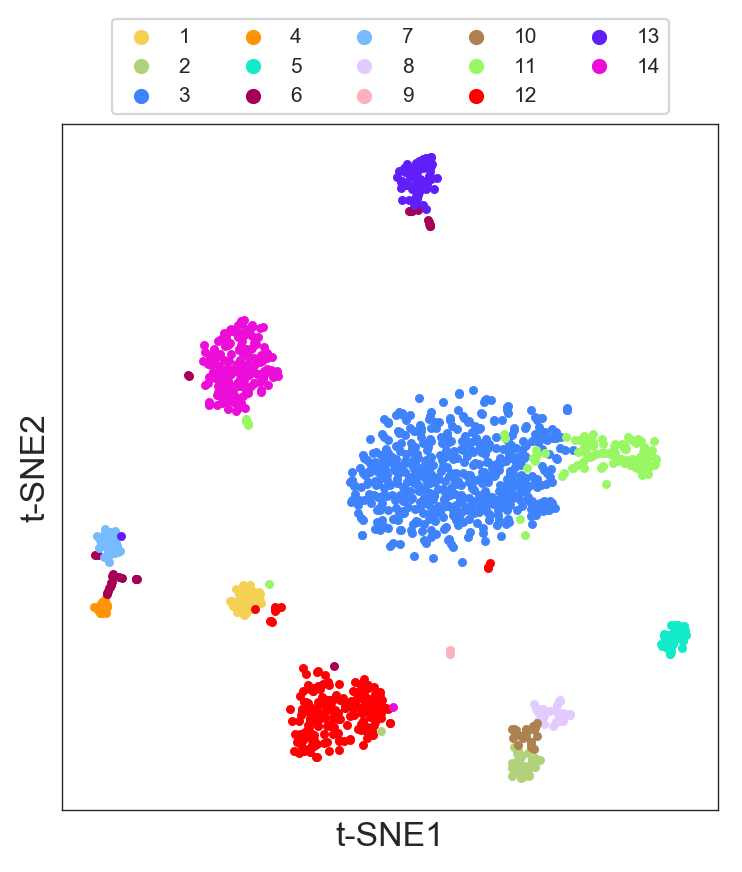

In [83]:
model.plot(labels=model.labels_hierarchy, legend=True)

### K-means clustering

- Randomly also has a function to perform k-means clustering. The parameter "n_clusters" selects the number of clusters:

In [64]:
model.fit_kmeans(n_clusters=16)

- You can visualize the k-means result in the t-SNE:

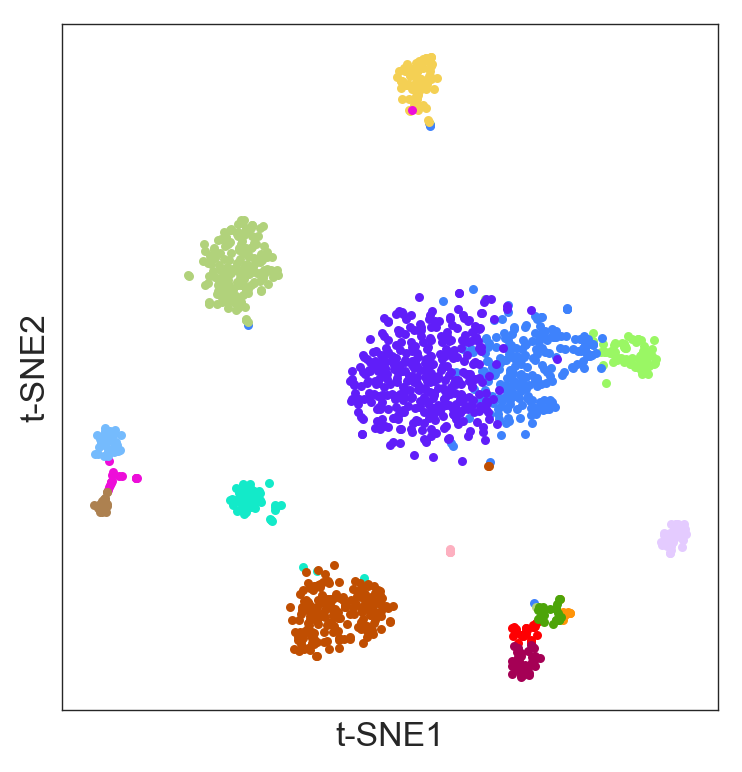

In [65]:
model.plot(labels=model.labels_kmeans)

### Gene expression profile across the clusters 

- Randomly has a function "model.get_gene_info()" that allows you to analyze your clusters to get biological insight. 
- The function "model.get_gene_info()" gives the expression profile of a gene or a list of genes across the different clusters. It does this by performing a violin plot and a ridge plot.
- The colors correspond to the label colors of the clustering methods (hierarchical or k-means) previously described.
- In following example, we will use the clusters obtained in the hierarchical clustering, using "labels=model.labels_hierarchy", to visualize the gene 'INS':

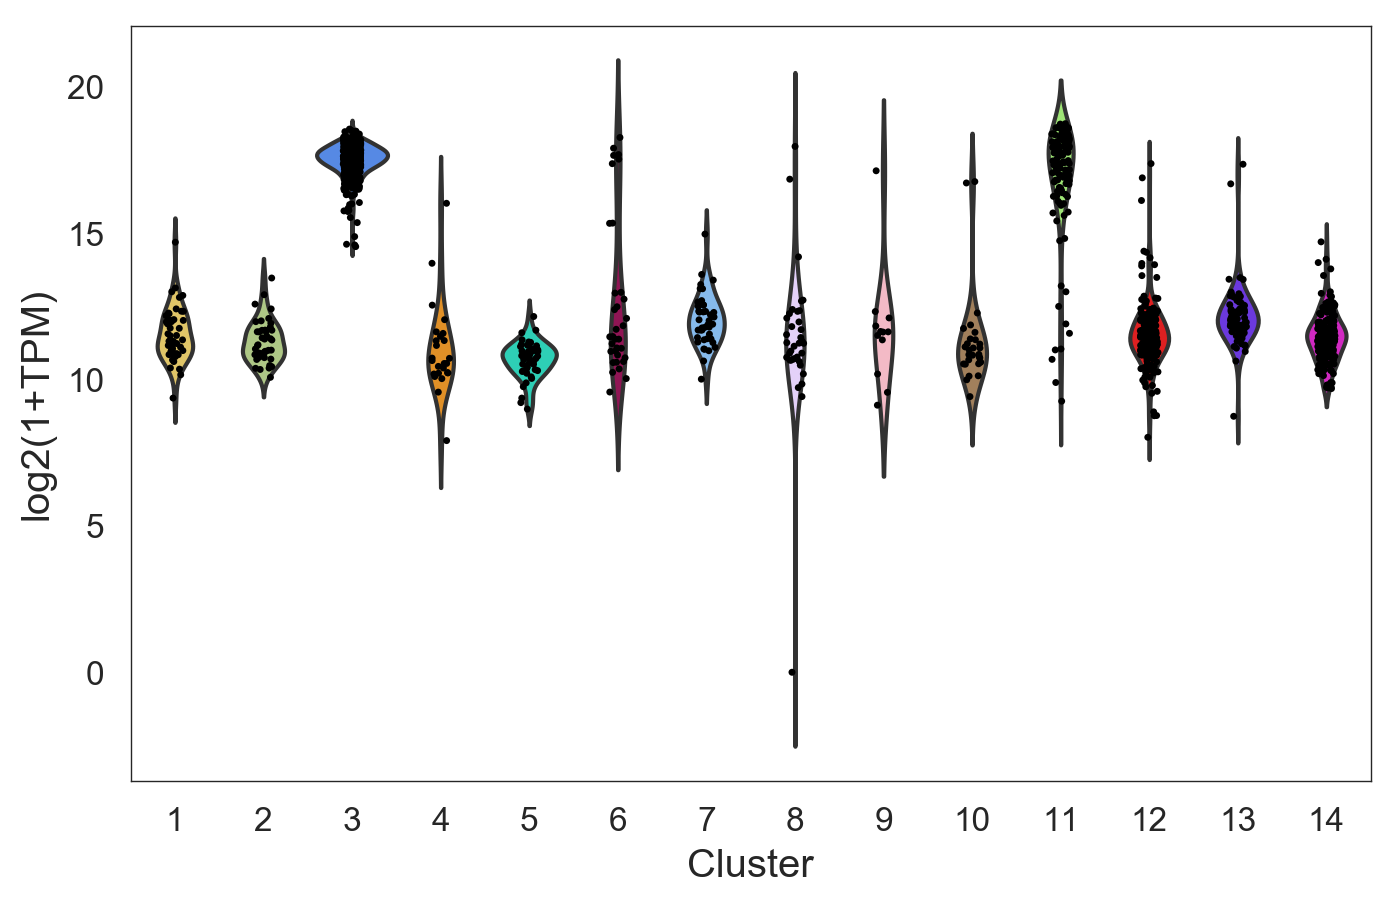

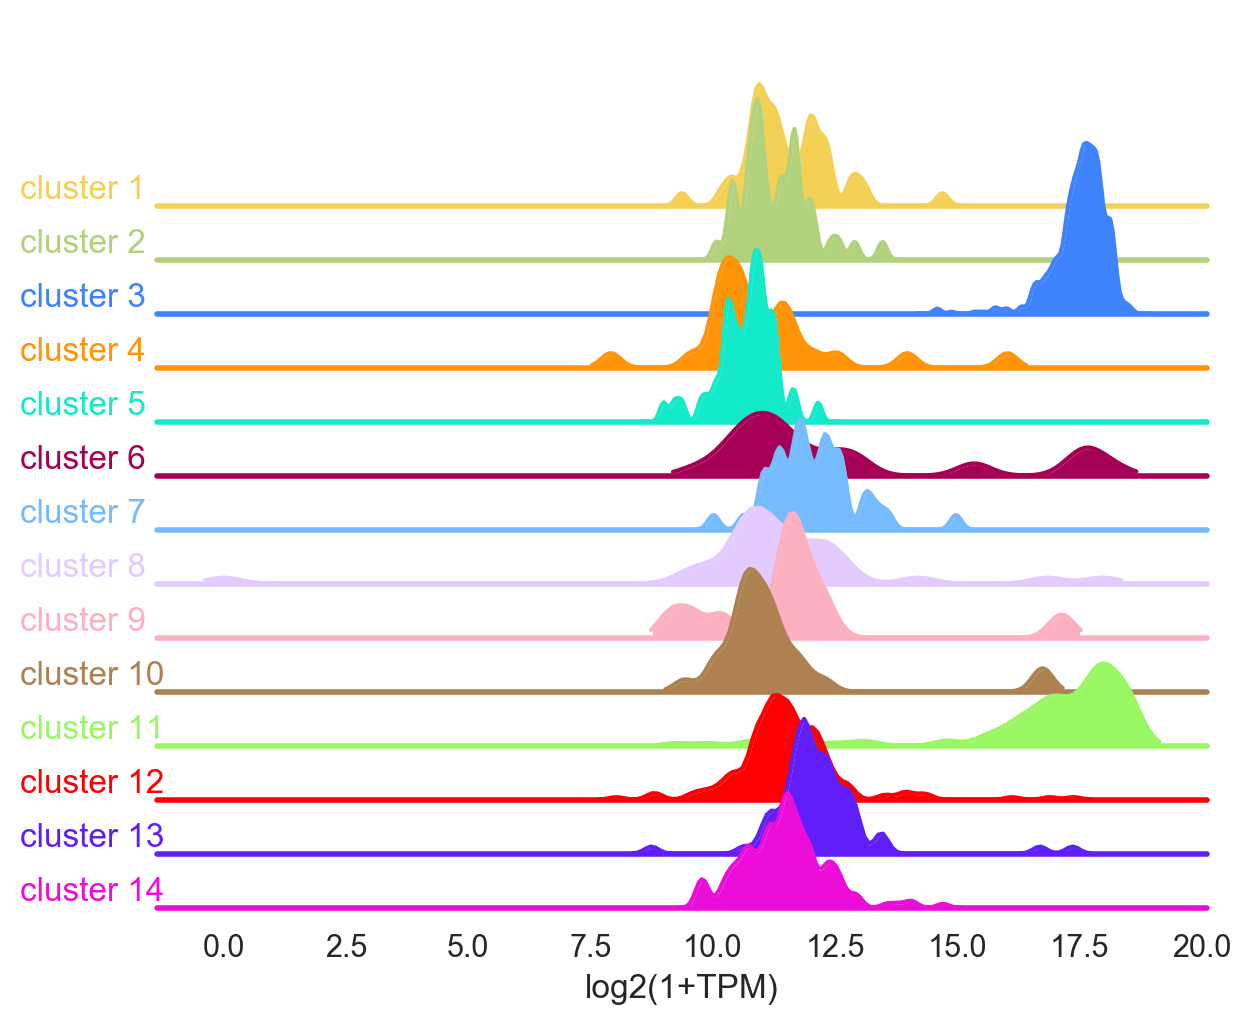

In [52]:
model.get_gene_info(labels=model.labels_hierarchy, gene=['INS'], size=8)

If several genes are used, for example "gene=['INS', 'PPY', 'PDFGRA']", then the function gives the average of  the genes in the list.

# Visualize genes  

- Randomly has a function to visualize the gene expression in the t-SNE:

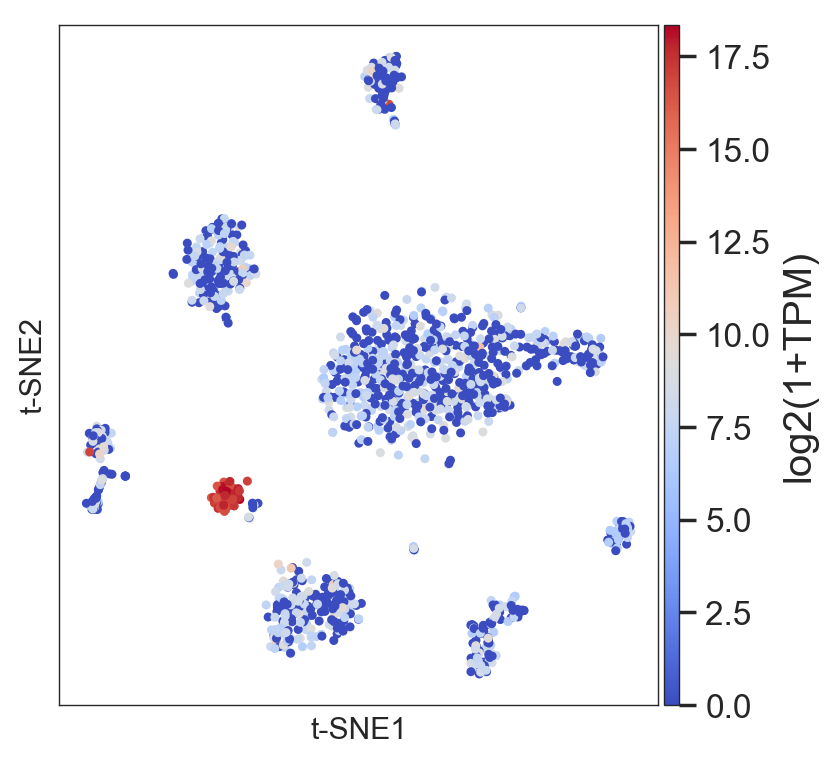

In [53]:
model.plot(gene=['PPY'], size=4)

or the average of a set of genes:

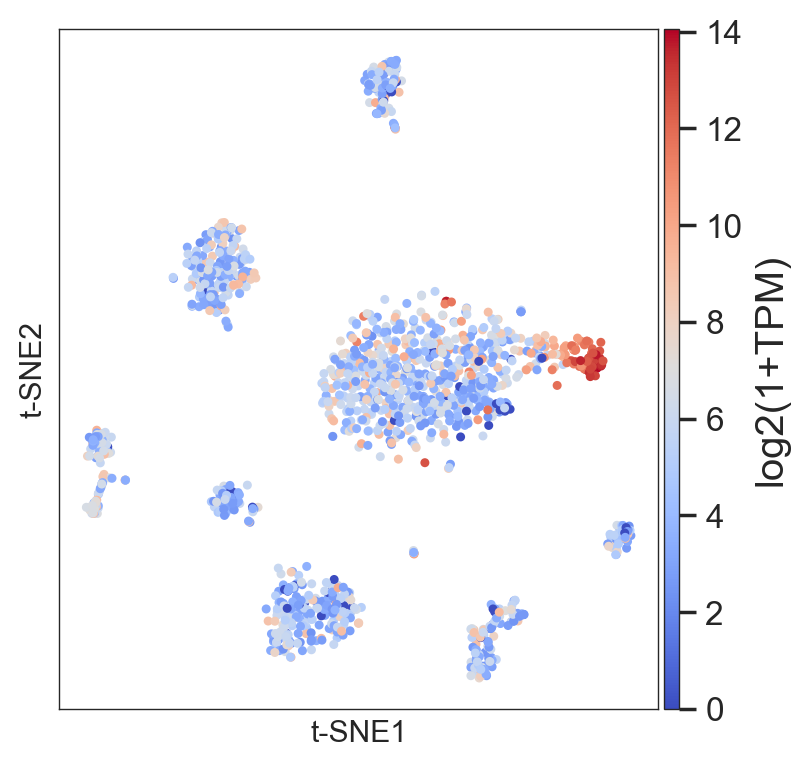

In [72]:
model.plot(gene=['DDIT3','HSPA5','HERPUD1'], size=4)

- The same function allows you to visualize a list of individual genes: 

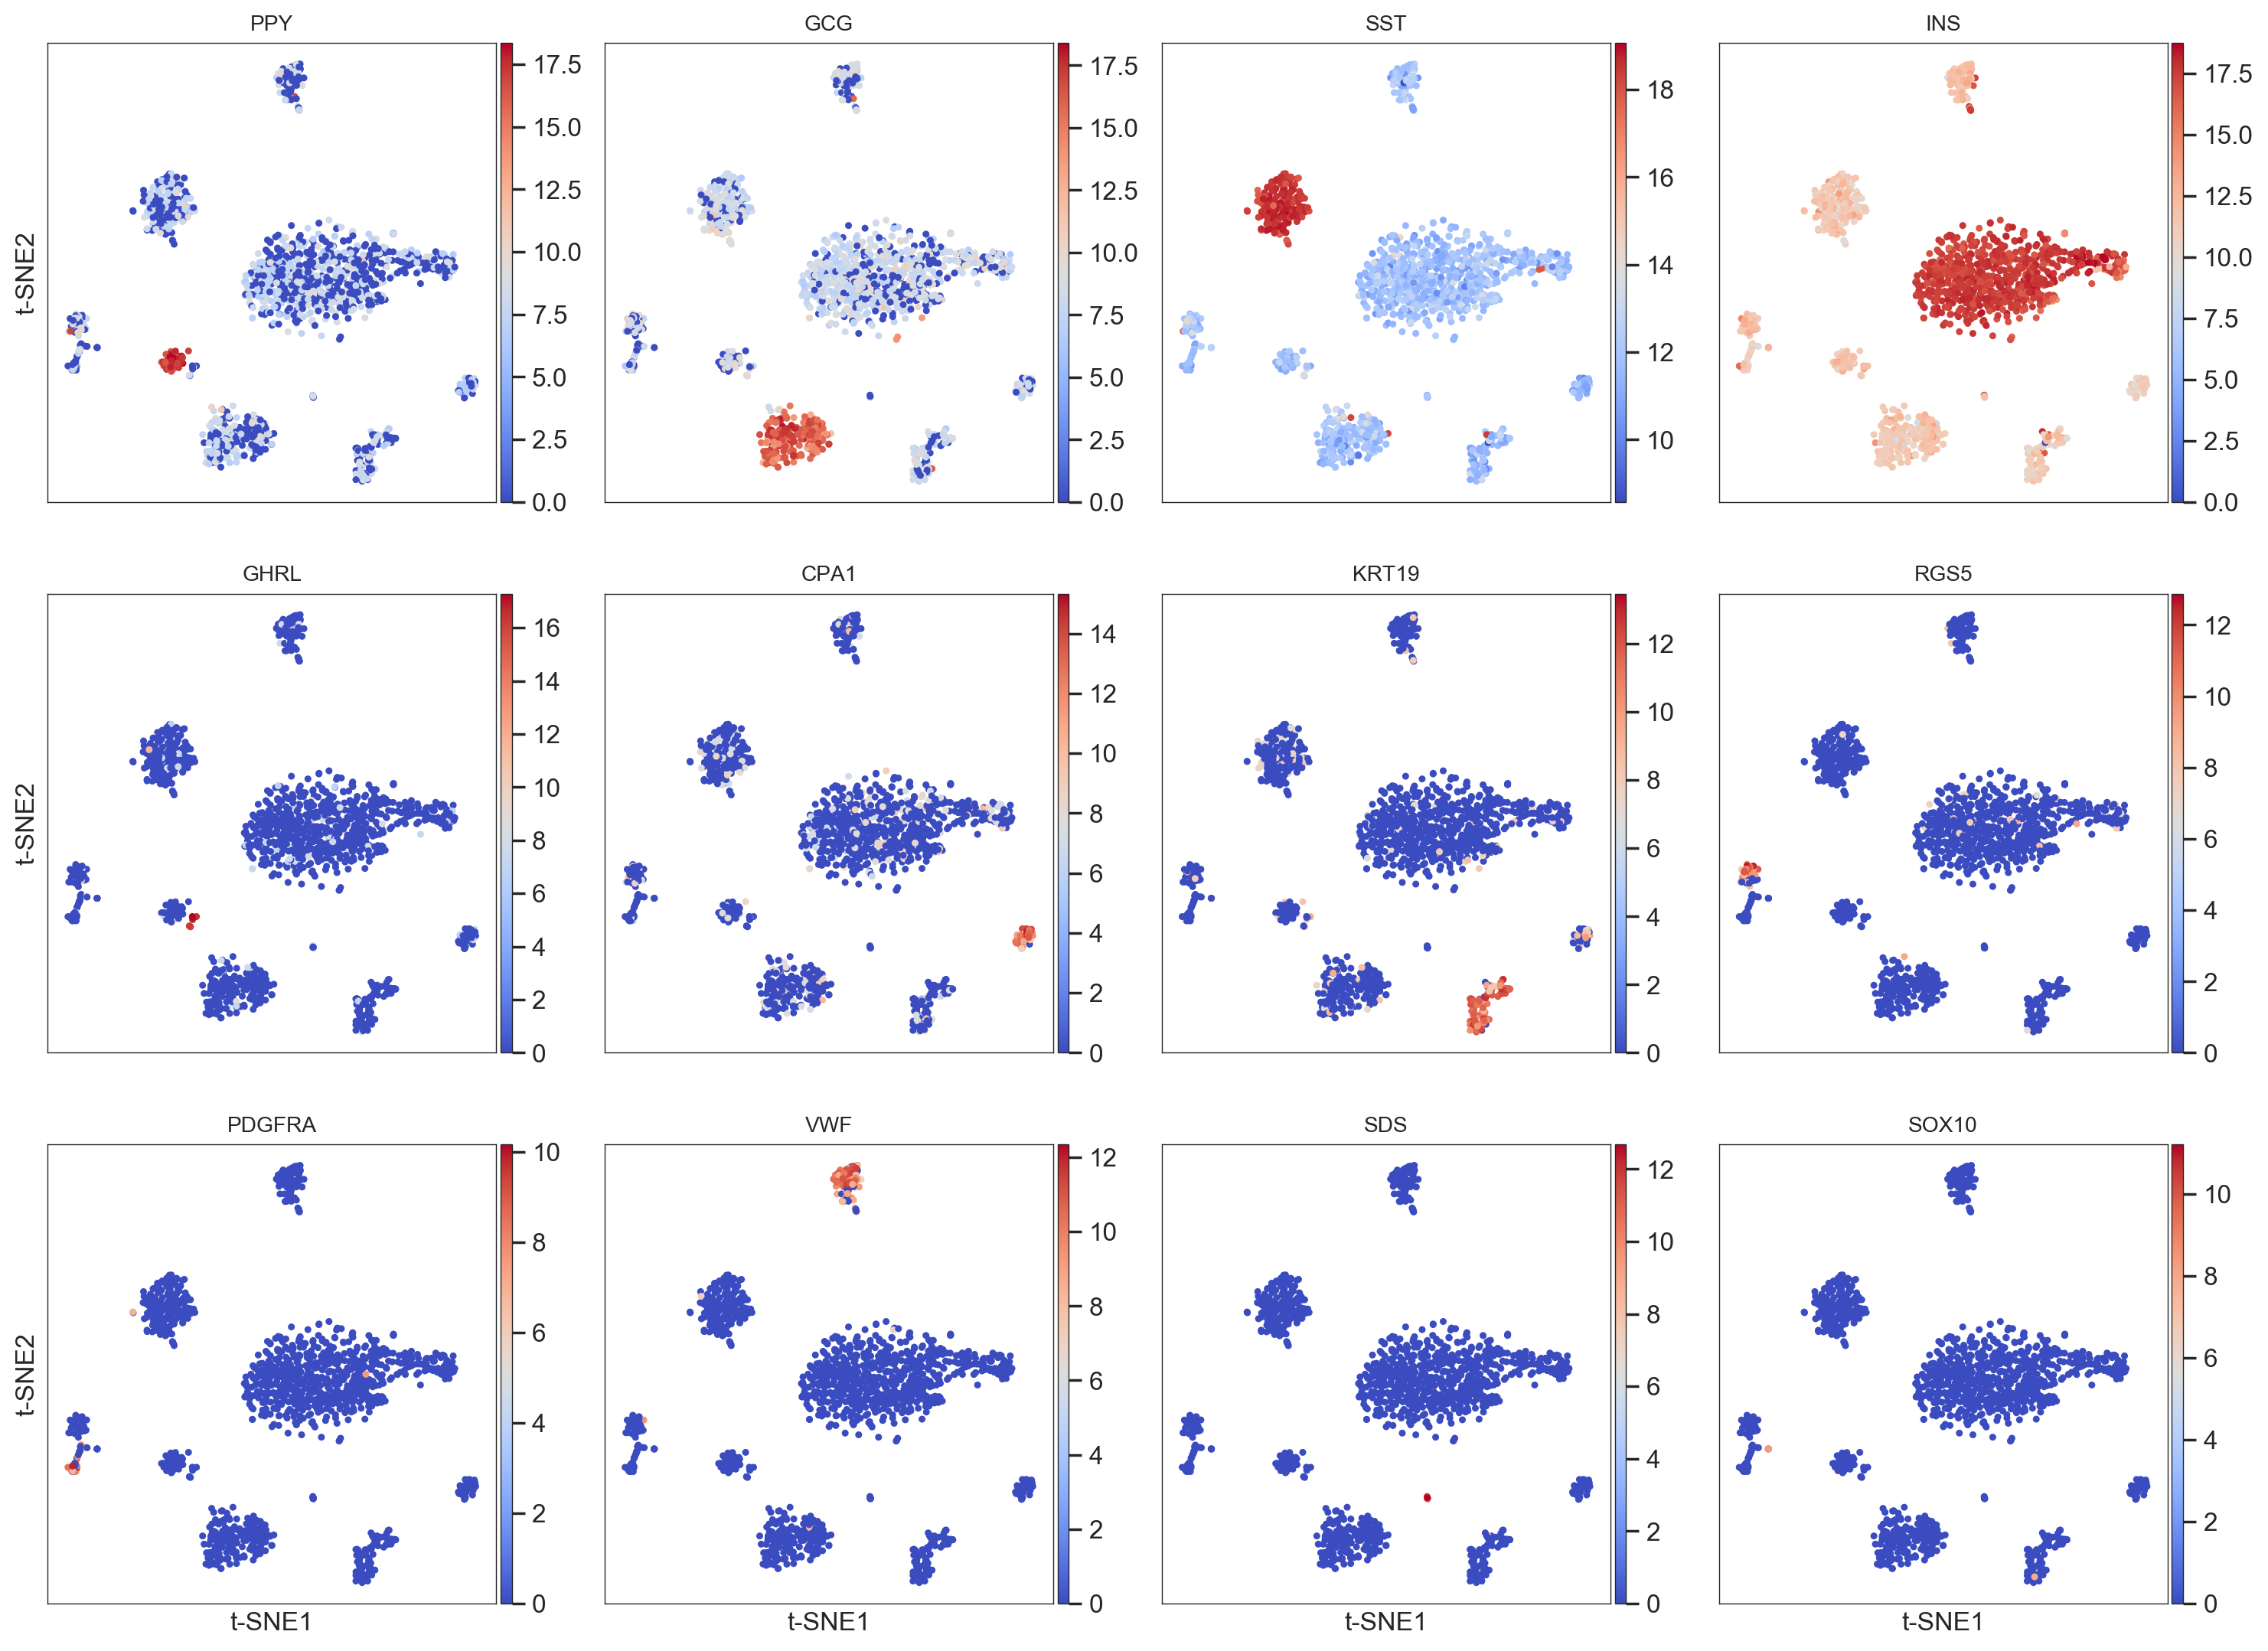

In [68]:
model.plot(gene=('PPY','GCG','SST','INS','GHRL','CPA1','KRT19'
                          ,'RGS5','PDGFRA','VWF','SDS','SOX10'))

# Tips and tricks

#### Get information about the clustering 

The function "model.get_cluster_info()" gives information about the clusters produced by the methods described previously:
    1. The number of cells.
    2. The 10 (by default) most expressed genes. By using "genes = number" we can increase the list. For example, "genes = 20" will give the top 20 genes.
    3. The function visualizes the genes in the t-SNE.
Here is an example with cluster 1 from the hierarchical clustering we have done before:

The cluster 1 has 49 cells


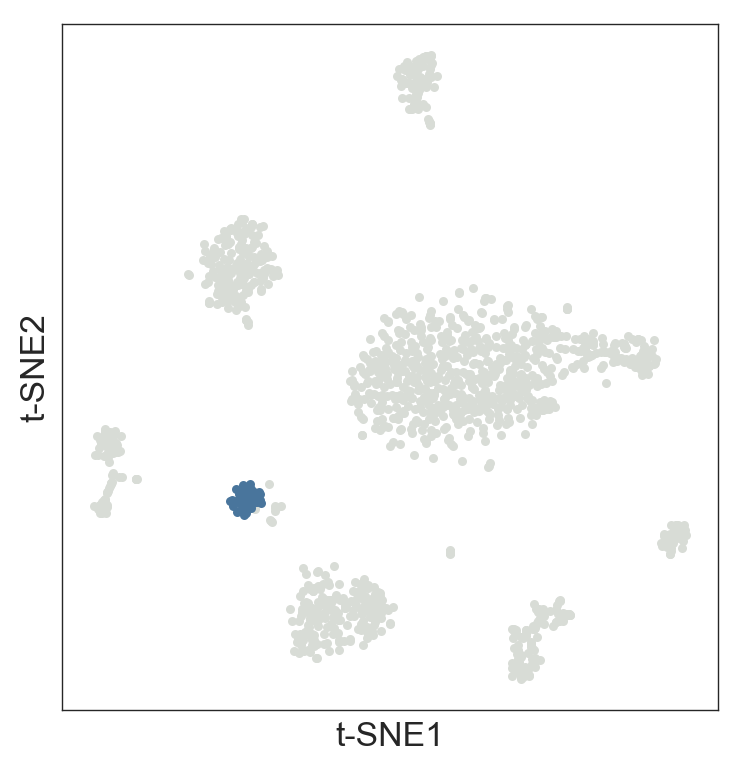

The top 10 highly expressed signal-like genes in this cluster are:
PPY
EEF1A1
GNAS
FTL
PCSK1N
CHGB
SST
CLU
SCG2
MALAT1


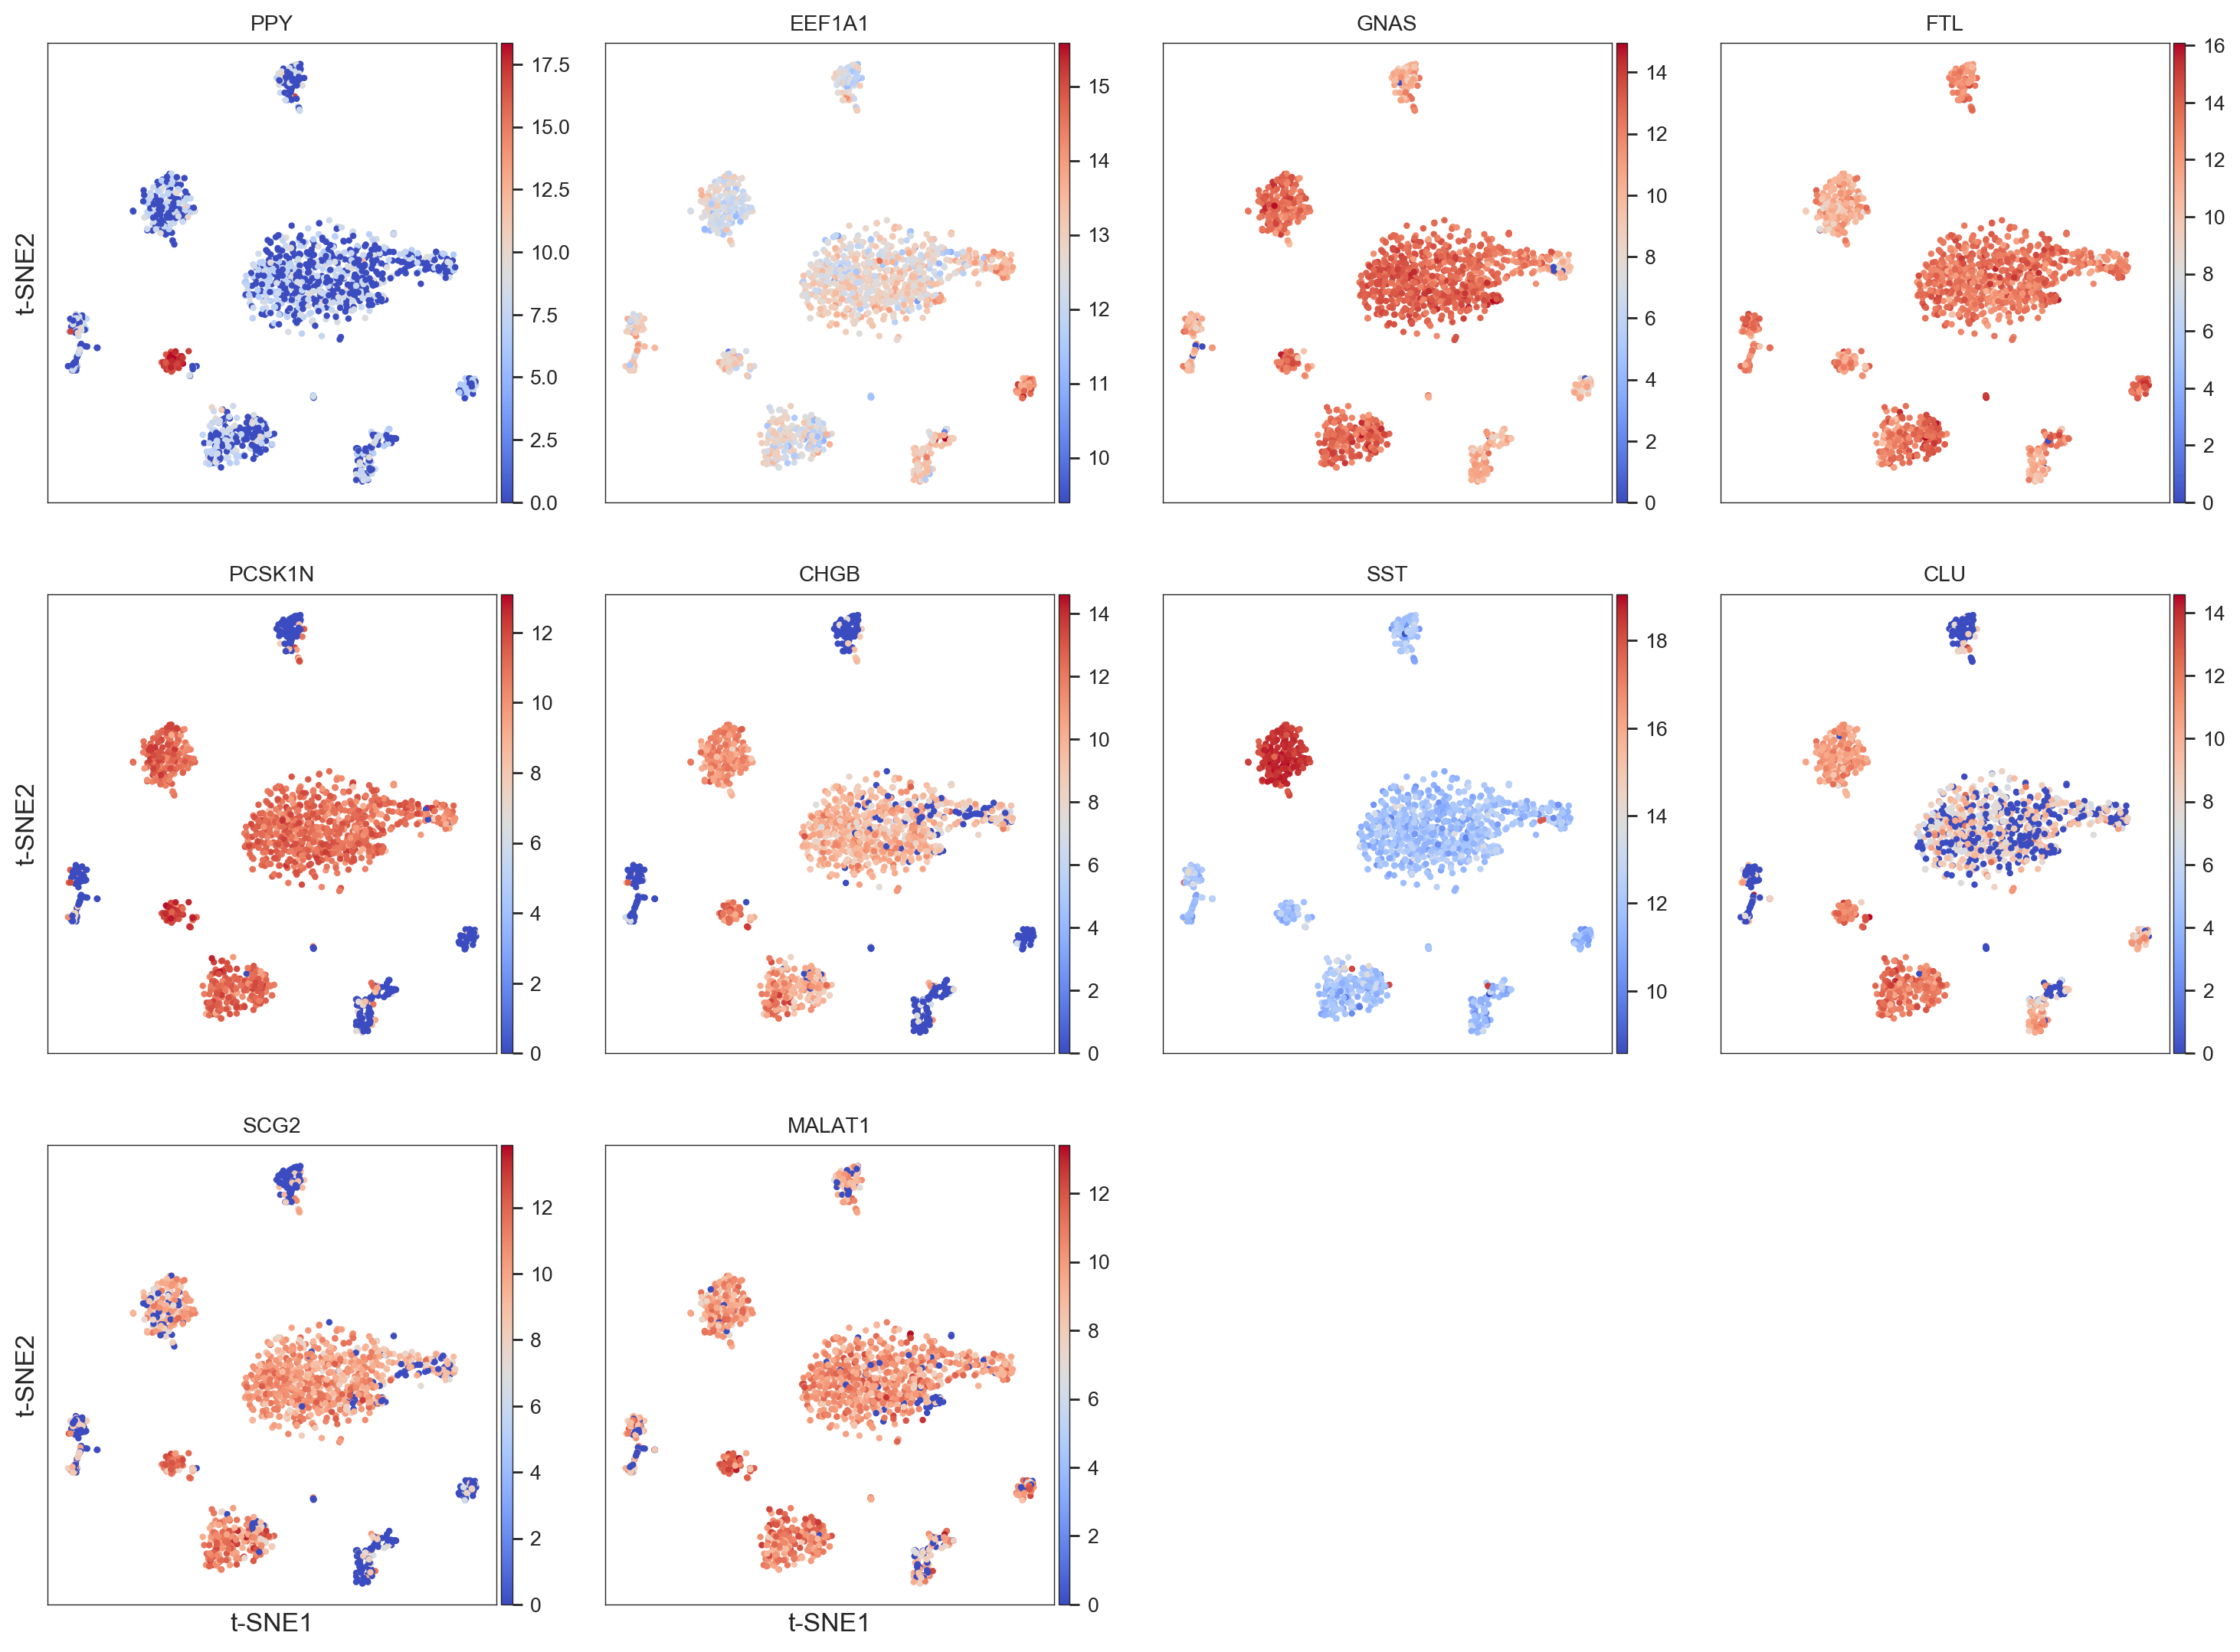

In [87]:
model.get_cluster_info(labels=model.labels_hierarchy, cluster=1)

#### Plot the library complexity of the original dataset

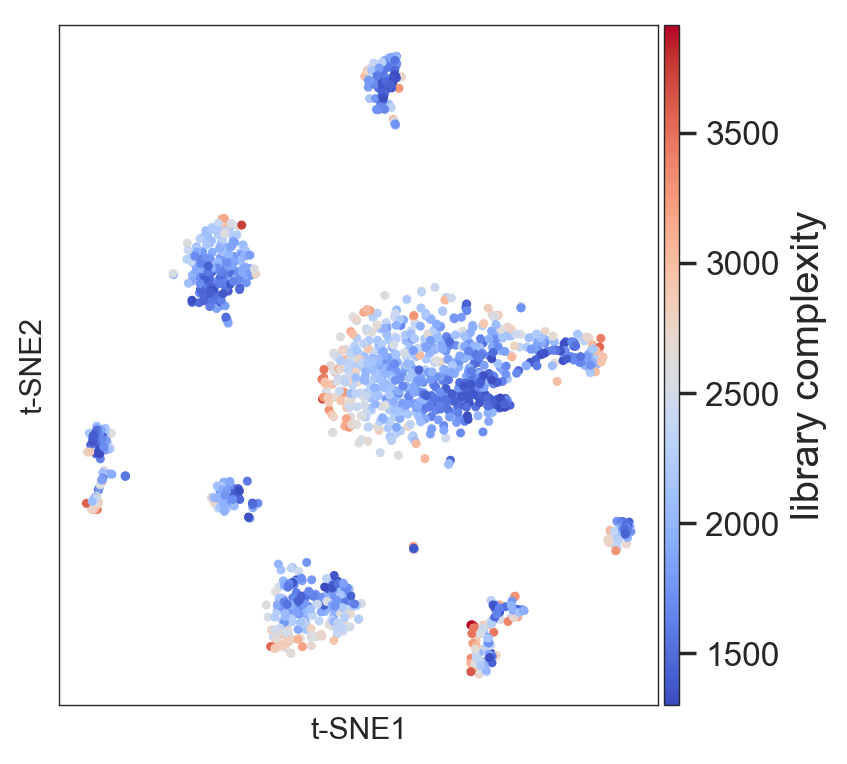

In [71]:
model.plot(gene=['library'], size=4)

#### Add a legend and more

- You can add a legend to t-SNE plots to identify your cell populations and subpopulations after your analysis.
- To identify the order of the color code, it is useful to start using "legend=True". We already did this when we performed the hierarchical clustering.
- Once you know  the color code, then add the legend list "legend=[list of your names]". For example:

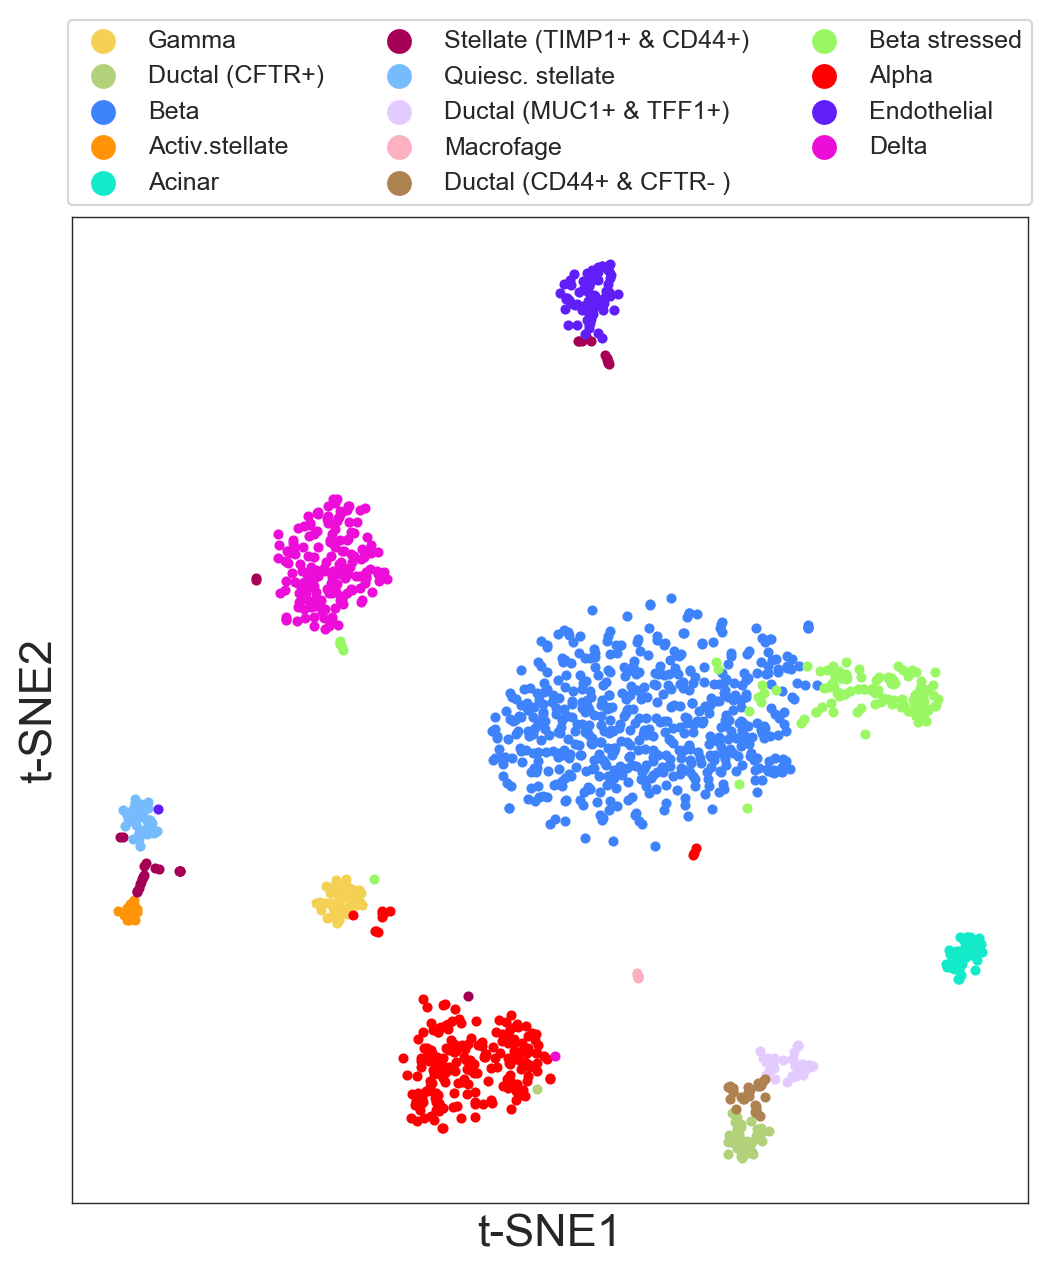

In [108]:
my_legend=['Gamma', 'Ductal (CFTR+)', 'Beta', 'Activ.stellate', 'Acinar', 'Stellate (TIMP1+ & CD44+)', 
           'Quiesc. stellate', 'Ductal (MUC1+ & TFF1+)', 'Macrofage', 'Ductal (CD44+ & CFTR- )', 
           'Beta stressed', 'Alpha', 'Endothelial', 'Delta']

model.plot(labels=model.labels_hierarchy, legend=my_legend, legendcol=3, size=6, points=7)

- "legendcol" sets how many columns you want to plot in the legend.
- "size" sets the size of the plot.
- "points" sets the size of the points.

You can use the same legend for the get_gene_info() function and get publication-ready plots. For example:

In [106]:
model.get_gene_info(labels=model.labels_hierarchy, gene=['INS'], size=8, legend=my_legend)

#### MAC OS with retina screen 

If you are using a MAC OS with retina display, to increase the quality of your plots you should use this option at the beginning of your script:

In [ ]:
%config InlineBackend.figure_format = 'retina'